[![imagenes](imagenes/pythonista.png)](https://pythonista.io)

## El protocolo HTTP.

Creado por Tim Berners-Lee en 1989, es el protocolo utilizado para acceder y publicar en la World Wide Web (o  web).
Significa Protocolo de transmisión de hipertexto.

Actualmente el World Wide Web Consortium (W3C) es la entidad encargada, entre otras cosas, de publicar la especificación del protocolo HTTP. La versión más reciente es HTTP/2, pero la mayoría de los servidores utilizan la versión HTTP/1.1.

https://www.w3.org/Protocols/

HTTP está basado en  una arquitectura cliente-servidor en la que se intercambian peticiones (requests) por parte del cliente y respuestas (responses) por parte del servidor.

### Características.
* **Sin estado.** Es decir, que cada una de las transacciones request/response que se realizan no afectan al estado del cliente o del servidor, además de que cada transacción es totalmente independiente de el resto.
* **Independiente del contenido.** Aún cuando es muy común que un servidor HTTP entregue documentos HTML, pero no existe restricción en el tipo de recurso al que se pueda acceder.
* **Sin conexión.** Una vez que la transacción request/response es terminada, la conexión entre cliente y servidor es destruida.


### Uniform Resource Locator (URL).

El protocolo HTTP permite localizar los diversos recursos disponbles en la web mediante los Localizadores Uniformes de Recursos (URL). La estructura de una URL es la siguiente:

```
http://<subdominio>.<dominio>:<puerto>/<ruta absoluta>?<parámetros>
```

HTTP utiliza por defecto el puerto 80.

El protocolo HTTPS es una variación del HTTP que permite cifrar las comunicaciones entre el cliente y el servdor. 

```
https://<subdominio>.<dominio>:<puerto>/<ruta absoluta>?<parámetros>
```

HTTPS utiliza el puerto 443 por defecto.

## Peticiones, respuestas y sesiones.

Las comunicaciones entre el cliente y el servidor consisten en un serie de intercambios de datos.

*  Un cliente por lo general envía una petición (request) a un servidor que se encuentra atendiendo a una dirección específica. La petición incluye generalmente los datos del cliente, asi como la información necesaria para que el servidor pueda procesar correctamente el requerimiento.
* El servidor recibe la petición y procesa los datos. Dependiendo de la petición, el servidor puede enviar cualquier tipo de recurso, así como mensajes de estado.
* A este intercambio de peticiones y respuestas entre un cliente y un servidor se conocen como sesiones.

## Mensajes de estado.
Los mensajes de estado permiten informar al cliente sobre la manera en la que ha sido procesada la petición. Está conformado por un número entero de 3 dígitos. En caso de que la petición haya sido procesada exitosamente, el servidor regresa el número 200.

### Tipos por el número inicial:
* 1xx Información.
* 2xx Éxito.
* 3xx Redireccionamiento.
* 4xx Error del cliente.
* 5xx Error del servidor.

Puede consultar los mensajes de estado de HTTP en la siguiente liga: http://www.restapitutorial.com/httpstatuscodes.html

## Métodos HTTP.

El protocolo HTTP define métodos o "verbos", los cuales permiten realizar peticiones específicas entre un cliente y un servidor. Algunos de los métodos más utilizados son:

* ***GET*** se utiliza para obtener los datos de un recurso a partir de una URI. La información enviada mediante *GET* puede ser añadida a marcadores y puede ser regsitrada en las bitácoras del servidor.
* ***HEAD*** es similar al método GET, pero sólo proporciona el encabezado de la petición y el mensaje de estado resultante.
* ***POST*** se utiliza para cear un recurso. Los datos enviados no son expuestos en la URI sino que son enviados dentro de la estructura de la petición. 
* ***PUT*** se utiliza para sustituir un recurso existente y su estructura es similar a la de *POST*.
* ***PATCH*** es un método que se utiliza para modificar parcialmente un recurso.
* ***DELETE*** es un método que se utiliza para eliminar un recurso. 

Existen algunos otros métodos como *OPTIONS*, *TRACE* y *CONNECT*, pero no están contemplados en el alcance de este taller. Puede consultar más al respecto puede acceder a https://developer.mozilla.org/es/docs/Web/HTTP/Methods.

### Idempotencia.

Un método es 'idempotente' cuando no importan las veces que se envíe la misma petición, ésta dará el mismo resultado.

### Seguridad.

Un método se considera seguro si no modifica los recursos a los que accede.


|*  Método  *|*  Idempotente  *|*  Seguro  *|
| -------- | ------------- | -------- |
|  **GET**  | Sí | Sí |
|  **HEAD**  | Sí | Sí |
|  **DELETE**  |Sí| No |
|  **POST**  | No | No|
|  **PUT**  | Sí | No|
|  **PATCH**  |No| No| 

### Advertencia sobre los métodos seguros.

La seguridad de un método depende de su implementación y aún cuando se considera como una mala práctica, es posible que los métodos como *GET* sean capaces de modificar al recurso al que acceden.

## El paquete _requests_.

El paquete [requests](http://docs.python-requests.org)  permite hacer peticiones mediante funciones que emulan los métodos del protocolo HTTP, regresando un objeto de Python que contiene los mensajes y datos de la respuesta del servidor a modo de atributos.

El paquete *requests* presenta funcionalidades avanzadas como autenticación, conexiones seguras, manejo de 'cookies', etc. 

In [1]:
!pip install requests

    100% |████████████████████████████████| 61kB 980kB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 1.8MB/s ta 0:00:011
    100% |████████████████████████████████| 163kB 2.8MB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 26.0MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 26.5MB/s ta 0:00:01


In [2]:
import requests

In [6]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the body of the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



**Ejemplo:**

* Se utilizará la función *requests.get()* en la URL https://pythonista.io/cursos para abir una conexión enviando una petición *GET*. 
* Se desplegarán los siguientes datos guardados en el objeto resultante. ligado al nombre *sitio*.
    * Los encabezados de la petición contenidos en el atributo *sitios.headers*
    * El mensaje de estado resultante contenido en el atributo *sitio.status_code*.
    * El contenido de la respuesta contenido en el atributo *sitio.content*. 
* Se cerrará la conexión mediante el método *sitio.close()*.

In [7]:
sitio = requests.get("https://pythonista.io/cursos") 

In [8]:
dir(sitio)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [9]:
print(sitio.headers)

{'Date': 'Tue, 05 Feb 2019 21:20:02 GMT', 'Server': 'Zope/(2.13.26, python 2.7.12, linux2) ZServer/1.1', 'Content-Language': 'es', 'Expires': 'Sat, 01 Jan 2000 00:00:00 GMT', 'X-Ua-Compatible': 'IE=edge', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'text/html;charset=utf-8', 'Via': '1.1 pythonista.io', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=15768000', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy-Report-Only': "default-src 'self'; img-src *; style-src 'unsafe-inline'; script-src 'unsafe-inline' 'unsafe-eval'", 'Content-Length': '5599', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}


In [10]:
print(sitio.status_code)

200


In [11]:
print(sitio.content)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="es" xml:lang="es">\n  <head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n      \n    <title>Cursos \xe2\x80\x94 Pythonista</title>\n    <!--\n    <link rel="shortcut icon" type="image/x-icon"\n          href="barceloneta-favicon.ico" />\n    <link rel="apple-touch-icon"\n          href="barceloneta-apple-touch-icon.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="144x144"\n          href="barceloneta-apple-touch-icon-144x144-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="114x114"\n          href="barceloneta-apple-touch-icon-114x114-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="72x72"\n          href="barceloneta-apple-touch-icon-72x72-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="57x57"\n          href="barceloneta-apple-touch-icon-57x57-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed"

In [14]:
sitio.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="es" xml:lang="es">\n  <head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n      \n    <title>Cursos — Pythonista</title>\n    <!--\n    <link rel="shortcut icon" type="image/x-icon"\n          href="barceloneta-favicon.ico" />\n    <link rel="apple-touch-icon"\n          href="barceloneta-apple-touch-icon.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="144x144"\n          href="barceloneta-apple-touch-icon-144x144-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="114x114"\n          href="barceloneta-apple-touch-icon-114x114-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="72x72"\n          href="barceloneta-apple-touch-icon-72x72-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="57x57"\n          href="barceloneta-apple-touch-icon-57x57-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed"\n          

In [18]:
sitio.close()

**Ejemplo:**

Se utilizará la función *requests.get()* en la URL https://pythonista.mx/cur (la cual no existe) para abir una conexión enviando una petición *GET*. Se desplegarán los siguientes datos guardados en el objeto resultante.

* El mensaje de estado resultante contenido en *sitio.status_code*.
* El contenido del atributo *sitio.content*. En este caso, un mensaje de error.

En este caso se utilizará la declaración *with* para cerrar la conexión ta pronto se ejecute el bloque de código  inscrito.

In [26]:
def get_url(url):
    with requests.get(url) as sitio:
        return sitio.status_code, sitio.content

In [28]:
get_url("https://pythonista.io")

(200,
 b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="es" xml:lang="es">\n  <head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n      \n    <title>Bienvenidos pythonistas \xe2\x80\x94 Pythonista</title>\n    <!--\n    <link rel="shortcut icon" type="image/x-icon"\n          href="barceloneta-favicon.ico" />\n    <link rel="apple-touch-icon"\n          href="barceloneta-apple-touch-icon.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="144x144"\n          href="barceloneta-apple-touch-icon-144x144-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="114x114"\n          href="barceloneta-apple-touch-icon-114x114-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="72x72"\n          href="barceloneta-apple-touch-icon-72x72-precomposed.png" />\n    <link rel="apple-touch-icon-precomposed" sizes="57x57"\n          href="barceloneta-apple-touch-icon-57x57-precomposed.png" />\n    <link rel="apple

**Ejemplo:**

Se utilizará la función *requests.get()* para acceder a https://pythonista.mx (el cual hace un redireccionamiento a https://pythonista.io) para abir una conexión enviando una petición *GET*. Se desplegarán los siguientes datos guardados en el objeto resultante.

* El mensaje de estado resultante.

En este caso se utilizará la declaración *with* para cerrar la conexión ta pronto se ejecute el bloque de código  inscrito.

In [29]:
with requests.head("https://pythonista.mx") as sitio:
    print(sitio.status_code)
    print(sitio.headers)

301
{'Date': 'Tue, 05 Feb 2019 21:38:20 GMT', 'Server': 'Apache/2.4.18 (Ubuntu)', 'Location': 'https://pythonista.io/', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=iso-8859-1'}


## Ejemplos prácticos para el uso de HTTP.

El sitio https://httpbin.org/ incluye ejemplos ilustrativos de los posibles usos del protocolo HTTP.

**Ejemplo:**

Se utilizará get para obtener un recurso que corresponde a una imagen https://httpbin.org/image/png.

In [37]:
resultado = requests.get("https://httpbin.org/image/png")

In [35]:
print(resultado.content)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x00d\x08\x02\x00\x00\x00\xff\x80\x02\x03\x00\x00\x1faIDATx\x9c\xdd}wXS\xd9\xd6\xfeJ#\xa1\x17\xc1 \x02\xa1\x08\xc1J\x19\x11E\x10\x1c\x11\x14\x10\xf8tl(\xea\xd8FGGT\xac\x9f\\\xeb\x8c\x0eV\xd4\xb1\xdca\xe4\n\xb6\x11\x1bEA\x14QA\x94&\x82\xa2B\x00EzoI \x10\x92\xf3\xfbc\x87\x10!\xc4$D\x7fw\xbe\xf7\xe1\xe199gg\xadu\xde\xb3\xf7>{\xaf\xbd\xd6\x0e\x0e\xc30\x00`\xb3\xd9\xc7\x8e\x1dKJJ\xca\xc9\xc9\xe9\xec\xec$\x93\xc9\x14\n\x85\xdc\x03UUU\x1a\x8dfjjjbbbjj\x8a\x0eTTT`\x10\xc00\xac\xbc\xbc\xbc\xb0\xb0\x90\xc1`0\x18\x8c\xf2\xf2r&\x93\xc9b\xb1\x98L&\x93\xc9\xe4\xf3\xf9\xea"000\xb0\xec\x81\x89\x89\t\x81@\x18\x8c\xea\xf6\xf6\xf6\xd2\xd2\xd2\x8f\x1f?~\xfc\xf8\x11\x1d|\xfa\xf4\x89\xcdfw\x8a\x80\xc3\xe1\x90\xc9d;;;77\xb7\xa0\xa0 UUU\x81\xd1\xa9\xa9\xa9&&&2\xe9\xc3\xe3\xf1vvvAAAw\xef\xdemmm\xc5\xa4Fyy\xf9\x993g\xa6O\x9f\xae\xac\xac,\xdf\xad*))9;;\x1f;v\xac\xa4\xa4Dz\xbd\xad\xad\xadw\xef\xde\r\n\n\xb2\xb3\xb3\xc3\xe3\xf12i411IMM\xc50\x0c\xc7f\xb3\xad

In [40]:
resultado.headers

{'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Date': 'Tue, 05 Feb 2019 21:48:39 GMT', 'Content-Type': 'image/png', 'Content-Length': '8090', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Via': '1.1 vegur'}

Para desplegar una imagen se utilziará el módulo _Image_ de iPython.

In [33]:
from IPython.display import Image

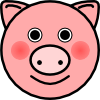

In [34]:
Image(resultado.content)

In [41]:
resultado.close()

**Ejemplo:**

El método post aplicado a https://httpbin.org

In [42]:
respuesta = requests.post("https://httpbin.org/post", json = {"saludo": "Hola"})

In [43]:
respuesta.headers

{'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Date': 'Tue, 05 Feb 2019 21:52:03 GMT', 'Content-Type': 'application/json', 'Content-Length': '445', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Via': '1.1 vegur'}

In [44]:
respuesta.status_code

200

In [45]:
respuesta.json()

{'args': {},
 'data': '{"saludo": "Hola"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '18',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'json': {'saludo': 'Hola'},
 'origin': '132.248.38.55',
 'url': 'https://httpbin.org/post'}

In [46]:
respuesta.close()

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2019.</p>